<a href="https://colab.research.google.com/github/manjunath-hanmantgad/python-development/blob/master/Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Visualising outliers

In [1]:
# using boxplots 
# iqr = (75th - 25th ) quantile
# upper_boundary = 75th quantile + (iqr * 1.5)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.datasets import fetch_california_housing

# load dataset
X,y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


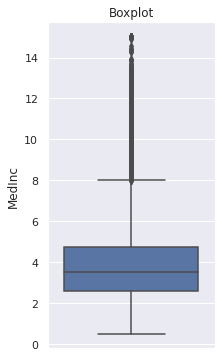

In [4]:
#boxplot for MedInc variable
plt.figure(
    figsize=(3,6)
)
sns.boxplot(
    y=X["MedInc"]
)
plt.title("Boxplot")
plt.show()

### using the mean and standard deviation

In normally distributed variables, more than 99% of the observations lie within the interval comprising the mean plus or minus three times the standard deviation. Thus, any values beyond those limits can be considered outliers.

In [8]:
from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std
# seed the random number generator
seed(1)
# generate univariate observations
data = 5 * randn(10000) + 50
# summarize
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

mean=50.049 stdv=4.994


In [9]:
data_mean, data_std = mean(data), std(data)
#outliers 
cut_off = data_std * 3
lower , upper = data_mean - cut_off , data_mean + cut_off

# identify outliers 
outliers = [x for x in data if x < lower or x > upper]
print(outliers)

[65.15428556186015, 69.79301352018982, 66.60539378085183, 34.73117809786848, 34.23321274904475, 34.91984007395351, 67.1633171589778, 34.679293219474495, 68.70124451852294, 65.67523670043954, 66.19171598376188, 33.73482882511691, 65.66014864070253, 65.06377284118616, 34.0469182658796, 33.6969245211173, 67.02151137874486, 65.59239795391275, 66.49270261640393, 65.74492012609815, 33.525707966507426, 34.72183379792847, 70.1342452227369, 33.90433947188079, 65.55945915508362, 68.06638503541573, 66.99057828251213, 67.80436660352774, 31.717799503726024]


In [10]:
#remove outliers 
outleirs_removed = [x for x in data if x > lower and x < upper]
print(outleirs_removed)

[58.121726818316205, 46.94121793174962, 47.359141238682724, 44.63515688921915, 54.327038146623394, 38.492306515598585, 58.7240588210824, 46.19396549552449, 51.59519548028549, 48.75314812261295, 57.31053968522487, 39.69929645251173, 48.38791397993246, 48.07972822665792, 55.66884721167719, 44.500543663429845, 49.13785896224782, 45.61070791039314, 50.21106873357797, 52.914076068579114, 44.49690411393539, 55.72361854919807, 54.50795360296398, 52.512471694509344, 54.504279746322055, 46.581360704128336, 49.38554887240676, 45.321152828704655, 48.66055960186992, 52.65177733369093, 46.54169624137346, 48.016232365720114, 46.564136499402004, 45.7739717925064, 46.643769345815905, 49.93667700540549, 44.413448256823614, 51.17207848908546, 58.29901088554935, 53.71022080288668, 49.04082223819193, 45.561855179575815, 46.264208531245814, 58.462273005138734, 50.25403877388015, 46.81502176715323, 50.95457742333733, 60.50127568239421, 50.60079476240814, 53.0860155485371, 51.50085159977914, 48.2387507675324